📌 Problem Statement

Telecom companies face high customer churn which directly impacts revenue and customer acquisition costs. Retaining existing customers is significantly more cost-effective than acquiring new ones.

This project aims to build a Machine Learning model to predict whether a telecom customer is likely to churn based on service usage, contract details, billing patterns, and customer demographics.

The objective is to help business teams identify high-risk customers early and design targeted retention strategies.

📌 Business Objective

• Identify customers with high churn probability
• Discover key factors driving churn behavior
• Support retention campaigns using predictive analytics
• Improve customer lifetime value and reduce revenue loss

📌 Dataset Overview

Dataset contains telecom customer information including:

• Demographics (Gender, Senior Citizen, Dependents)
• Service Usage (Internet Service, Phone Service, Online Security etc.)
• Account Information (Tenure, Contract Type, Payment Method, Monthly Charges)
• Target Variable: Customer Churn

Total Records: ~7000+ customers
Target Variable: Churn (Yes / No)

📌 Project Approach

Data Cleaning & Preprocessing
Exploratory Data Analysis (EDA)
Feature Engineering
Model Building & Training
Model Evaluation
Churn Driver Analysis
Business Recommendations

### **1)Import libraries-**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### **2)Dataset Load-**

In [16]:
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
df.shape

(7043, 21)

### **3)Data Cleaning-**

In [22]:
# Convert TotalCharges to numeric -
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [23]:
#Remove Missing Values-
df.dropna(inplace=True)

In [25]:
# Identifying NULL Values-
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [24]:
#Target Variable Convert (Churn)-
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **4)Exploratory Data Analysis (EDA)-**

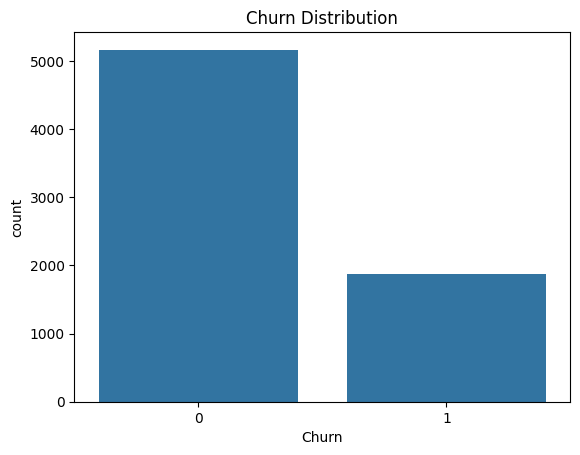

In [26]:
#Churn Distribution-
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

/tmp/ipython-input-3059949021.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(x="Contract", hue="Churn", data=df, color="orange")


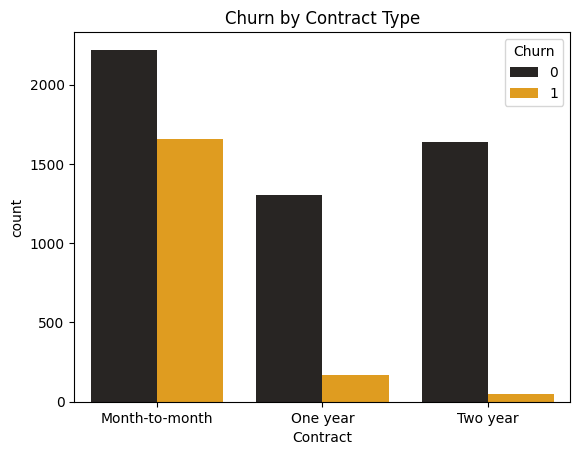

In [27]:
#Churn vs Contract Type-
sns.countplot(x="Contract", hue="Churn", data=df, color="orange")
plt.title("Churn by Contract Type")
plt.show()

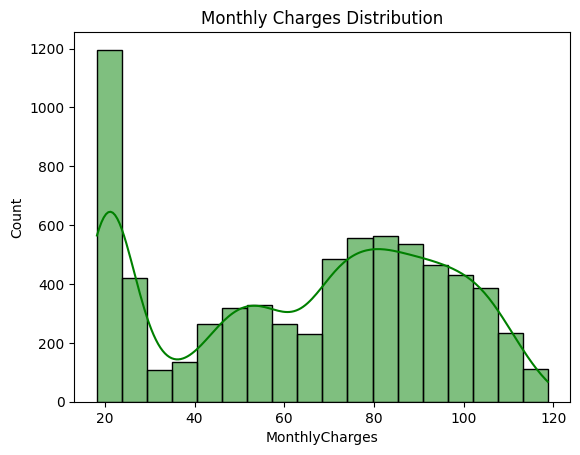

In [29]:
#Monthly Charges Distribution-
sns.histplot(df["MonthlyCharges"], kde=True, color="Green")
plt.title("Monthly Charges Distribution")
plt.show()

### **5)Feature Engineering-**

In [30]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

### **6)Model Building-**

In [31]:
#Define Features & Target-
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [32]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#Train Model-
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### **7)Model Evaluation-**

In [38]:
#Prediction-
y_pred = model.predict(X_test)

In [39]:
# Accuracy Score-
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



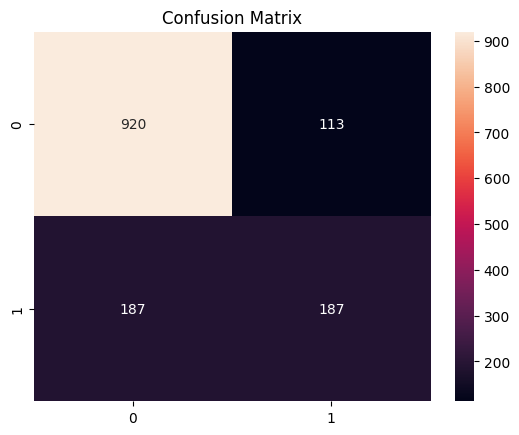

In [40]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [13]:
#Feature Importance-
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
TotalCharges,0.157264
MonthlyCharges,0.147436
tenure,0.136336
customerID,0.127121
Contract,0.072545
OnlineSecurity,0.052595
PaymentMethod,0.042481
TechSupport,0.040832
InternetService,0.025426
gender,0.022760


In [ ]:
#Business Insight Writing
'''
Top churn drivers:
• Contract Type
• Monthly Charges
• Tenure
• Internet Service

Business Impact:Target high risk customers using retention offers.
''''

### **8)Conclusion -**

The model successfully predicts customer churn using historical customer data. The analysis highlights key factors influencing churn such as contract type and monthly charges.